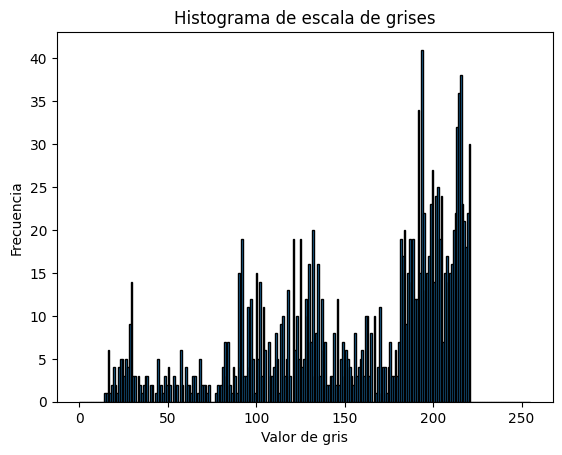

El valor del píxel C1 (188.8109837138385) corresponde a una temperatura de 35.72 °C.
El valor del píxel F1 (0) corresponde a una temperatura de -5.00 °C.


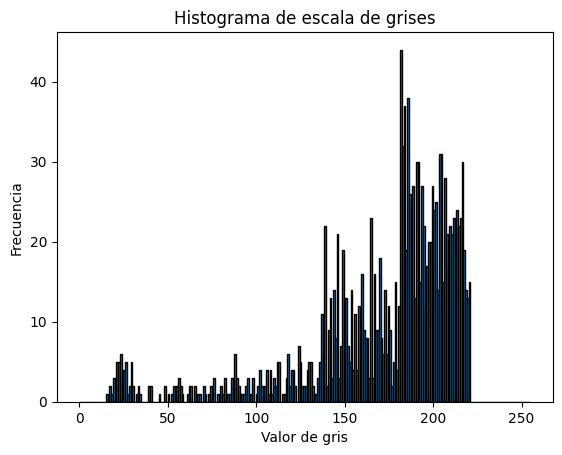

El valor del píxel C1 (191.52233809446517) corresponde a una temperatura de 36.31 °C.
El valor del píxel F1 (155.17627906976745) corresponde a una temperatura de 28.47 °C.


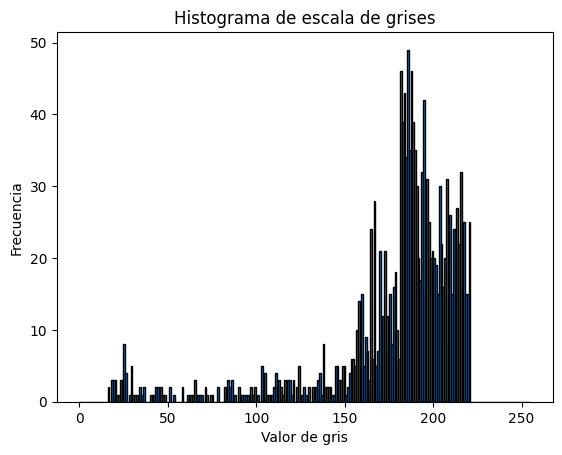

El valor del píxel C1 (175.74847481827624) corresponde a una temperatura de 32.91 °C.
El valor del píxel F1 (158.75849731663686) corresponde a una temperatura de 29.24 °C.


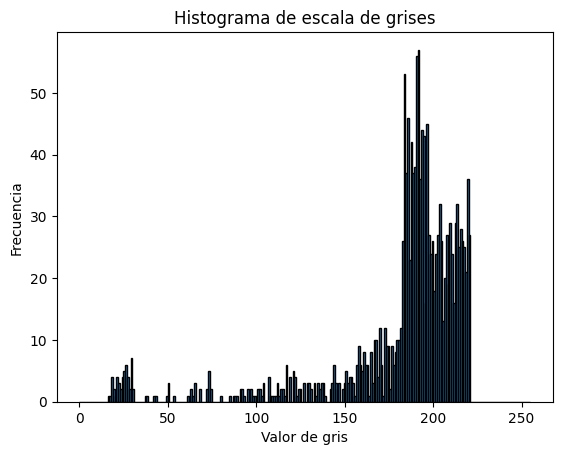

El valor del píxel C1 (179.8915109280963) corresponde a una temperatura de 33.80 °C.
El valor del píxel F1 (158.25865665415103) corresponde a una temperatura de 29.13 °C.


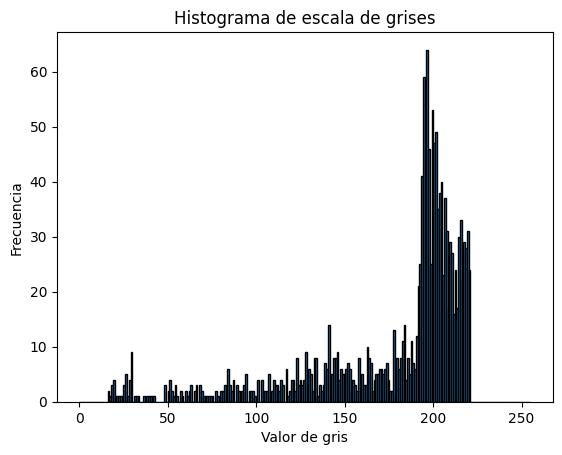

El valor del píxel C1 (191.60422827420237) corresponde a una temperatura de 36.33 °C.
El valor del píxel F1 (0) corresponde a una temperatura de -5.00 °C.


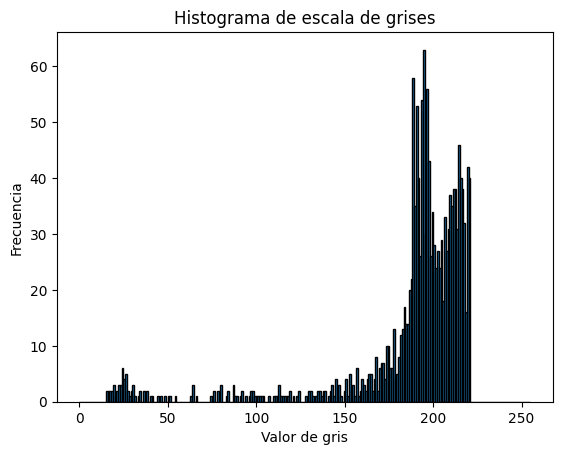

El valor del píxel C1 (171.2528919026725) corresponde a una temperatura de 31.94 °C.
El valor del píxel F1 (0) corresponde a una temperatura de -5.00 °C.


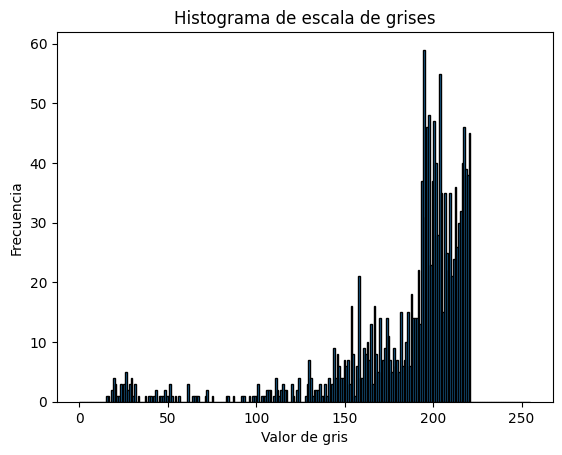

El valor del píxel C1 (167.320525682183) corresponde a una temperatura de 31.09 °C.
El valor del píxel F1 (152.7090425531915) corresponde a una temperatura de 27.94 °C.


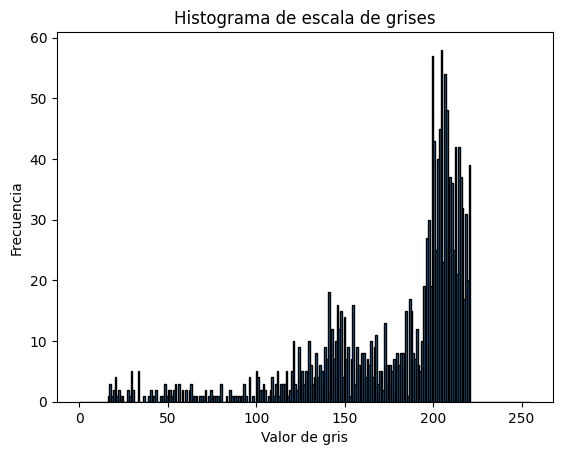

El valor del píxel C1 (193.3152039049984) corresponde a una temperatura de 36.70 °C.
El valor del píxel F1 (169.80392156862746) corresponde a una temperatura de 31.62 °C.


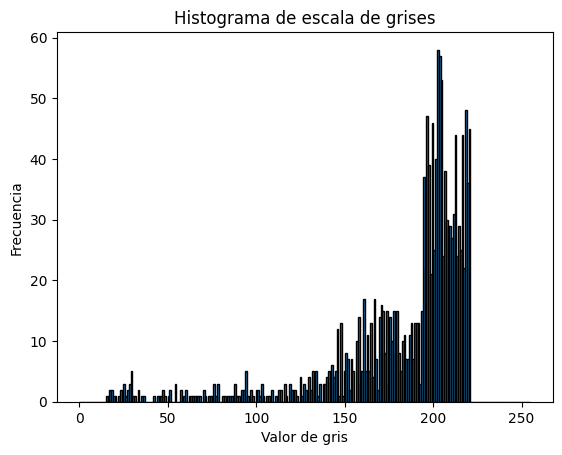

El valor del píxel C1 (174.80056793359546) corresponde a una temperatura de 32.70 °C.
El valor del píxel F1 (155.35104669887278) corresponde a una temperatura de 28.51 °C.


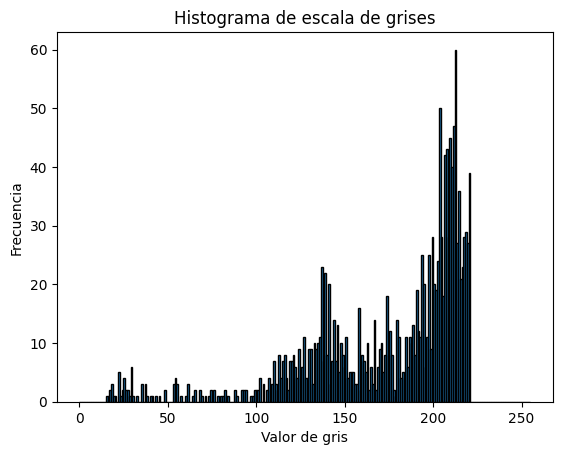

El valor del píxel C1 (169.86490731582225) corresponde a una temperatura de 31.64 °C.
El valor del píxel F1 (0) corresponde a una temperatura de -5.00 °C.
Resultados guardados en 'resultados_temperatura.csv'


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

def recortar_imagen_centro(ruta_imagen, lado_cuadrado):
    # Cargar la imagen
    imagen = Image.open(ruta_imagen)

    # Obtener dimensiones de la imagen
    ancho, alto = imagen.size

    # Calcular las coordenadas del área a recortar
    izquierda = (ancho - lado_cuadrado) // 2
    superior = (alto - lado_cuadrado) // 2
    derecha = (ancho + lado_cuadrado) // 2
    inferior = (alto + lado_cuadrado) // 2

    # Recortar la imagen
    imagen_recortada = imagen.crop((izquierda, superior, derecha, inferior))

    return imagen_recortada

# Preparar el DataFrame para guardar resultados
results = []

# Procesar imágenes desde capture_20 hasta capture_29
lado_cuadrado = 400  # Define el tamaño del recorte cuadrado

for i in range(20, 30):
    ruta_imagen = f'/content/capture_{i}.png'  # Ruta de la imagen

    imagen_recortada = recortar_imagen_centro(ruta_imagen, lado_cuadrado)

    # Cargar la imagen
    imagen = np.array(imagen_recortada)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR)
    reducidaC = cv2.resize(imagen, (int(imagen.shape[1] * 0.1), int(imagen.shape[0] * 0.1)))

    # Convertimos la imagen a grises
    RC_gray = cv2.cvtColor(reducidaC, cv2.COLOR_BGR2GRAY)

    # Histograma
    plt.hist(RC_gray.ravel(), bins=256, range=(0, 255), edgecolor='black')
    plt.xlabel('Valor de gris')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de escala de grises')
    plt.show()

    # Convertimos la imagen en una imagen binaria
    _, threshC = cv2.threshold(RC_gray, 145, 255, cv2.THRESH_BINARY_INV)
    contoursC, _ = cv2.findContours(threshC, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos
    area_min = 70
    area_max = 1000
    contours_filteredC = [c for c in contoursC if cv2.contourArea(c) >= area_min and cv2.contourArea(c) <= area_max]

    # Crear una máscara binaria del contorno
    mask = np.zeros(RC_gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, contours_filteredC, -1, (255), -1)

    # Aplicar la máscara a la imagen original
    RC_cropped = cv2.bitwise_and(reducidaC, reducidaC, mask=mask)

    # Calcular el promedio de píxeles no cero para cada capa
    r, g, b = cv2.split(RC_cropped)
    avg_red0 = np.mean(r[r > 0]) if np.sum(r > 0) > 0 else 0
    avg_green0 = np.mean(g[g > 0]) if np.sum(g > 0) > 0 else 0
    avg_blue0 = np.mean(b[b > 0]) if np.sum(b > 0) > 0 else 0

    # Calcular promedio solo si hay valores válidos
    sumaC = 0
    contador = 0

    if avg_red0 > 0:
        sumaC += avg_red0
        contador += 1
    if avg_green0 > 0:
        sumaC += avg_green0
        contador += 1
    if avg_blue0 > 0:
        sumaC += avg_blue0
        contador += 1

    promedioC1 = sumaC / contador if contador > 0 else 0

    # Calcular el promedio de la otra imagen
    _, thresh = cv2.threshold(RC_gray, 140, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    area_min = 20
    area_max = 53
    contours_filtered = [c for c in contours if cv2.contourArea(c) >= area_min and cv2.contourArea(c) <= area_max]

    # Crear una máscara binaria del contorno
    mask = np.zeros(RC_gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, contours_filtered, -1, (255), -1)

    # Aplicar la máscara a la imagen original
    R0_cropped = cv2.bitwise_and(reducidaC, reducidaC, mask=mask)





    # Calcular promedios para la segunda imagen
    r, g, b = cv2.split(R0_cropped)
    avg_red0F = np.mean(r[r > 0]) if np.sum(r > 0) > 0 else 0
    avg_green0F = np.mean(g[g > 0]) if np.sum(g > 0) > 0 else 0
    avg_blue0F = np.mean(b[b > 0]) if np.sum(b > 0) > 0 else 0

    # Calcular promedio solo si hay valores válidos
    sumaF = 0
    contadorF = 0

    if avg_red0F > 0:
        sumaF += avg_red0F
        contadorF += 1
    if avg_green0F > 0:
        sumaF += avg_green0F
        contadorF += 1
    if avg_blue0F > 0:
        sumaF += avg_blue0F
        contadorF += 1

    promedioCF = sumaF / contadorF if contadorF > 0 else 0

    # Convertir los promedios a temperatura
    def pixel_to_temperature(pixel_value, min_temp=-5, max_temp=50, min_pixel=0, max_pixel=255):
        temperature = (pixel_value - min_pixel) / (max_pixel - min_pixel) * (max_temp - min_temp) + min_temp
        return temperature

    C1 = pixel_to_temperature(promedioC1)
    F1 = pixel_to_temperature(promedioCF)

    print(f"El valor del píxel C1 ({promedioC1}) corresponde a una temperatura de {C1:.2f} °C.")
    print(f"El valor del píxel F1 ({promedioCF}) corresponde a una temperatura de {F1:.2f} °C.")

    # Guardar resultados
    results.append({'C1': C1 , 'F1': F1 / 10})  # Dividiendo por 10 como en tu código original

# Crear un DataFrame a partir de los resultados
df = pd.DataFrame(results)

# Guardar o agregar resultados al archivo CSV existente sin crear columnas nuevas
csv_file_path = 'resultados_temperatura.csv'

if os.path.exists(csv_file_path):
    # Cargar el archivo existente
    df_existente = pd.read_csv(csv_file_path)

    # Concatenar nuevos resultados
    df_nuevo = pd.concat([df_existente, df], ignore_index=True)
else:
    # Si no existe, crear un nuevo DataFrame
    df_nuevo = df

# Guardar el DataFrame actualizado en el archivo CSV
df_nuevo.to_csv(csv_file_path, index=False)

print("Resultados guardados en 'resultados_temperatura.csv'")

          C1        F1
0  35.723938 -0.500000
1  36.308740  2.846939
2  32.906534  2.924203
3  33.800130  2.913422
4  36.326402 -0.500000
5  31.936898 -0.500000
6  31.088741  2.793724
7  36.695436  3.162438
8  32.702083  2.850709
9  31.637529 -0.500000


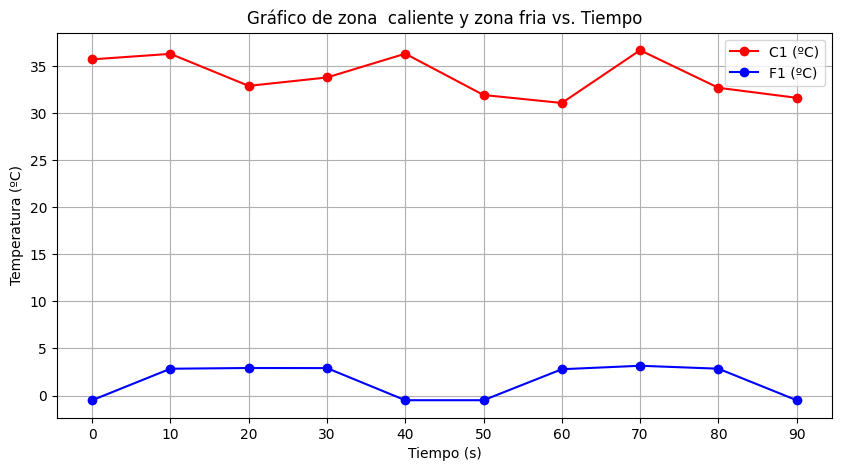

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('/content/resultados_temperatura.csv')

# Verifica que los datos se han cargado correctamente
print(datos)

# Crear una columna de tiempo
n = len(datos)  # Número de filas en el DataFrame
tiempo = [i * 10 for i in range(n)]  # Generar tiempo cada 10 segundos

# Crear el DataFrame nuevo con tiempo
datos['tiempo'] = tiempo

# Graficar las variables C1 y F1
plt.figure(figsize=(10, 5))
plt.plot(datos['tiempo'], datos['C1'], marker='o', linestyle='-', color='r', label='C1 (ºC)')
plt.plot(datos['tiempo'], datos['F1'], marker='o', linestyle='-', color='b', label='F1 (ºC)')

# Añadir títulos y etiquetas
plt.title('Gráfico de zona  caliente y zona fria vs. Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (ºC)')
plt.xticks(range(0, int(tiempo[-1]) + 10, 10))  # Ajustar ticks del eje x
plt.grid()
plt.legend()
plt.show()